In [ ]:
# @title Task no 1 : part a

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = {
    'Outlook': ['sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'overcast', 'overcast', 'overcast', 'overcast', 'rain', 'rain', 'rain', 'rain', 'rain'],
    'Temp': [75, 80, 85, 72, 69, 72, 83, 64, 81, 71, 65, 75, 68, 70],
    'Humidity': [70, 90, 85, 95, 70, 90, 78, 65, 75, 80, 70, 80, 80, 96],
    'Windy': ['TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE'],
    'Class': ['play', 'Don’t play', 'Don’t play', 'Don’t play', 'play', 'play', 'play', 'play', 'play', 'Don’t play', 'Don’t play', 'play', 'play', 'play']
}

df = pd.DataFrame(data)

# Data preparation
df = pd.get_dummies(df, columns=['Outlook', 'Windy'], drop_first=True)

# Split the dataset
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.3333333333333333


**Task no 2**

In [ ]:
# @title 1. Data Exploration and Pre-processing:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/amazon_reviews.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB
None
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie   

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [ ]:
# Handle missing values
df = df.dropna()

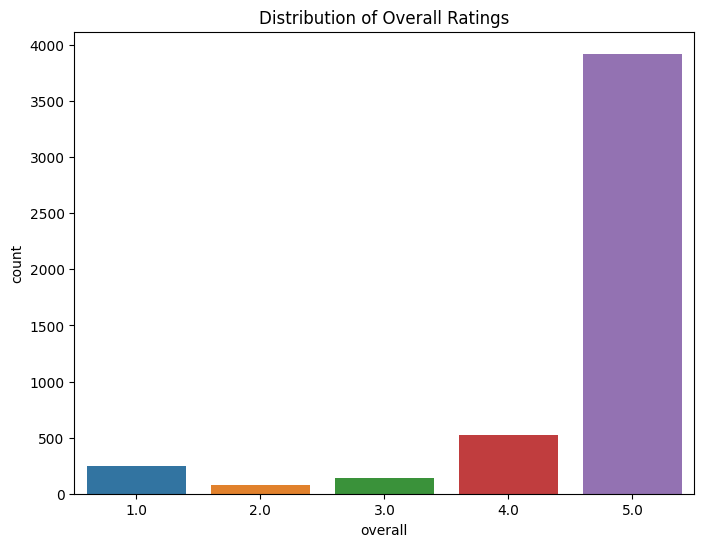

In [ ]:
# Data visualization
# Distribution of overall ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.title('Distribution of Overall Ratings')
plt.show()




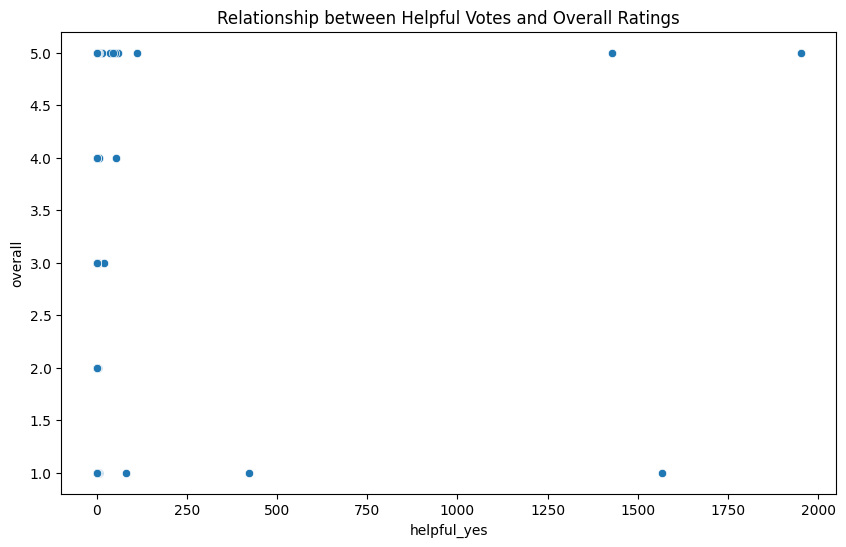

In [ ]:
# Relationship between helpful votes and overall ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='helpful_yes', y='overall', data=df)
plt.title('Relationship between Helpful Votes and Overall Ratings')
plt.show()

In [ ]:
# @title 2. Feature Engineering:

# Display columns of the DataFrame
print(df.columns)


Index(['reviewText', 'helpful_yes', 'helpful_no', 'total_vote',
       'review_length', 'overall_2.0', 'overall_3.0', 'overall_4.0',
       'overall_5.0'],
      dtype='object')


In [ ]:
# Identify relevant features
relevant_features = ['reviewText', 'helpful_yes', 'helpful_no', 'total_vote', 'review_length', 'overall_2.0', 'overall_3.0', 'overall_4.0', 'overall_5.0']
df = df[relevant_features].copy()

# Create new features (if necessary)
# Example: Creating a new feature 'helpful_ratio' based on the ratio of helpful votes to total votes
df['helpful_ratio'] = df['helpful_yes'] / df['total_vote'].replace(0, 1)  # Avoid division by zero

# Convert categorical variables into numerical representations
# No further encoding is required since 'overall_2.0', 'overall_3.0', 'overall_4.0', and 'overall_5.0' are already numerical representations

# Display the updated dataframe
print(df.head())

                                          reviewText  helpful_yes  helpful_no  \
1  Purchased this for my device, it worked as adv...            0           0   
2  it works as expected. I should have sprung for...            0           0   
3  This think has worked out great.Had a diff. br...            0           0   
4  Bought it with Retail Packaging, arrived legit...            0           0   
5  It's mini storage.  It doesn't do anything els...            0           0   

   total_vote  review_length  overall_2.0  overall_3.0  overall_4.0  \
1           0            158            0            0            0   
2           0            166            0            0            1   
3           0            340            0            0            0   
4           0            290            0            0            0   
5           0            282            0            0            0   

   overall_5.0  helpful_ratio  
1            1            0.0  
2            0        

In [ ]:
# @title 3. Model Selection and Training:

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target variable
X = df.drop(['reviewText'], axis=1)  # Exclude 'reviewText' from features
y = df['overall_5.0']  # Target variable, assuming 'overall_5.0' is the positive class

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 1.0000
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       780

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


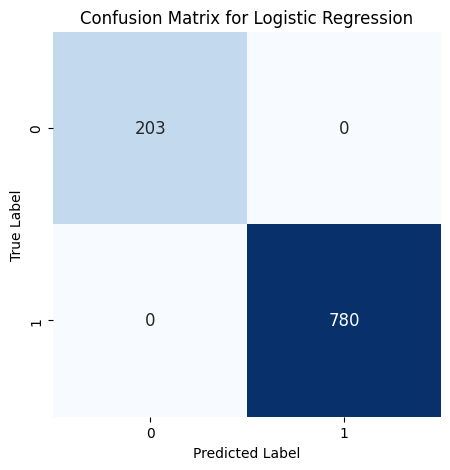

Decision Tree Accuracy: 1.0000
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       780

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983

--------------------------------------------------


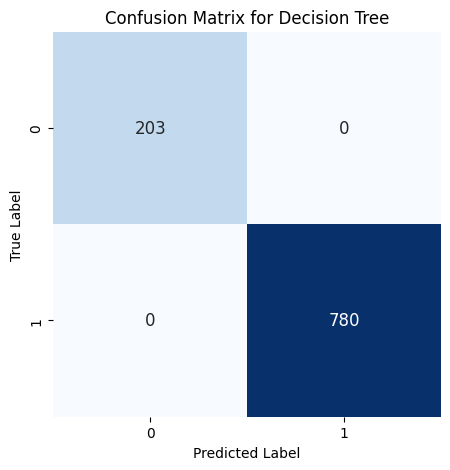

Random Forest Accuracy: 1.0000
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       780

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983

--------------------------------------------------


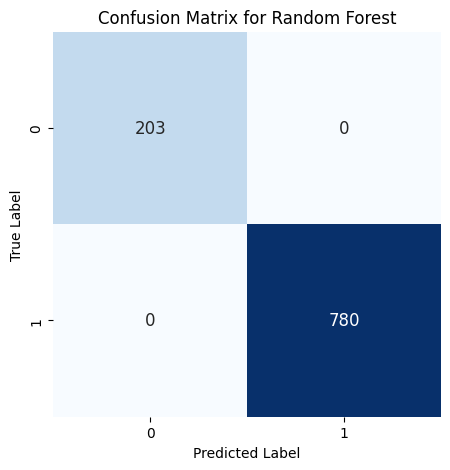

Support Vector Machine Accuracy: 0.7976
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.60      0.06      0.11       203
           1       0.80      0.99      0.89       780

    accuracy                           0.80       983
   macro avg       0.70      0.52      0.50       983
weighted avg       0.76      0.80      0.73       983

--------------------------------------------------


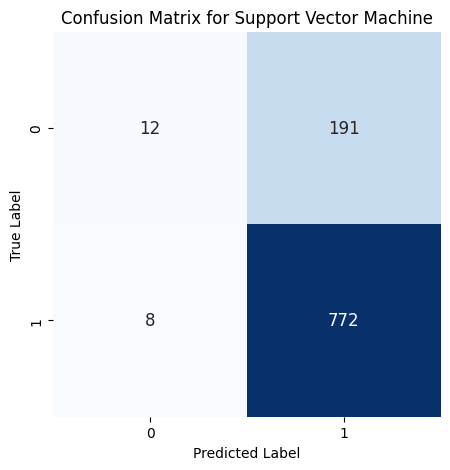

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Function to print formatted output
def print_model_results(model_name, accuracy, classification_report_str):
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n{classification_report_str}")
    print("-" * 50)

# Model selection and training
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    # Print formatted output
    print_model_results(model_name, accuracy, classification_report_str)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [ ]:
# @title 4. Hyperparameter Tuning:

import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.exceptions import ConvergenceWarning

# Assuming you have a DataFrame df with the relevant features and target variable

# Identify features and target
X = df.drop('reviewText', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df['overall_5.0']  # Replace 'target_column_name' with the actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 200],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Filter out the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Create GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best logistic regression model
best_logistic_regression = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Best Hyperparameters:", best_params)
print("Best Logistic Regression Model Accuracy:", accuracy)
print("Classification Report for Best Logistic Regression Model:")
print(classification_rep)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best Logistic Regression Model Accuracy: 1.0
Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       780

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



In [ ]:
# @title 5. Model Evaluation:

# Model selection and training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)  # Enable probability estimation for SVM
}

# Define a list to store evaluation results
evaluation_results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred)

    # Recall
    recall = recall_score(y_test, y_pred)

    # F1-Score
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        # For models that don't have predict_proba, roc_auc is set to None
        roc_auc = None

    # Store the results in a dictionary
    result_dict = {
        'Model': model_name,
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    # Append the result dictionary to the list
    evaluation_results.append(result_dict)

# Print or visualize the results as needed
for result in evaluation_results:
    print(f"Results for {result['Model']}:")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1-Score: {result['F1-Score']:.4f}")
    print(f"ROC-AUC: {result['ROC-AUC']:.4f}" if result['ROC-AUC'] is not None else "ROC-AUC: Not applicable")
    print("-" * 50)


Results for Logistic Regression:
Confusion Matrix:
[[203   0]
 [  0 780]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
--------------------------------------------------
Results for Decision Tree:
Confusion Matrix:
[[203   0]
 [  0 780]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
--------------------------------------------------
Results for Random Forest:
Confusion Matrix:
[[203   0]
 [  0 780]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
--------------------------------------------------
Results for Support Vector Machine:
Confusion Matrix:
[[ 12 191]
 [  8 772]]
Accuracy: 0.7976
Precision: 0.8017
Recall: 0.9897
F1-Score: 0.8858
ROC-AUC: 0.9348
--------------------------------------------------


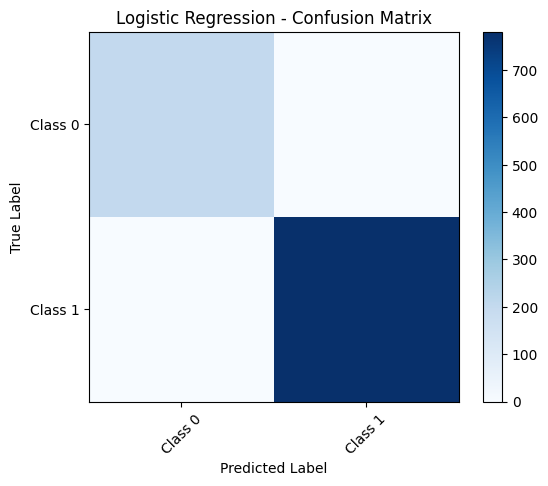

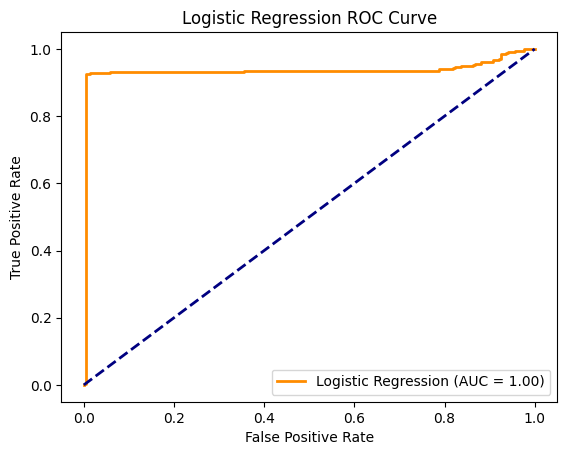

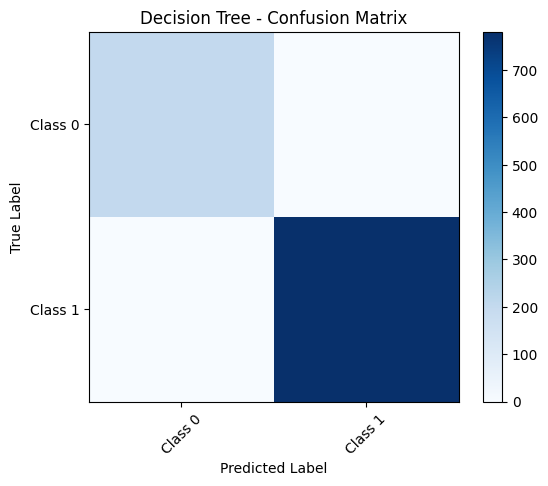

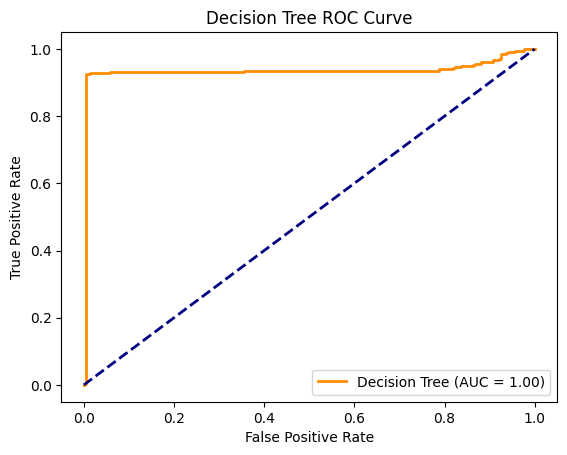

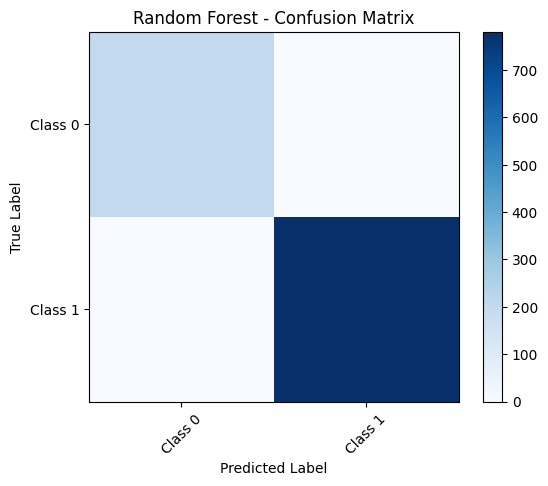

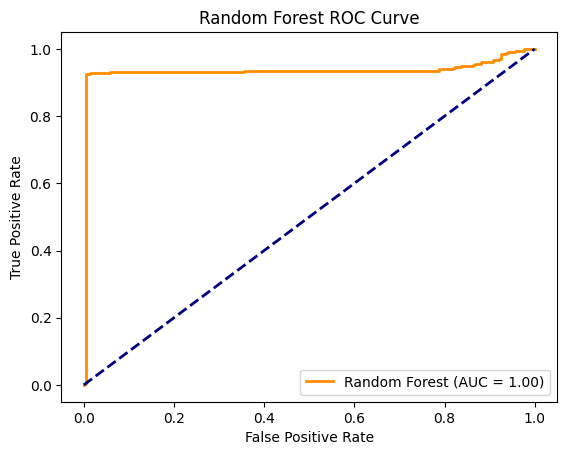

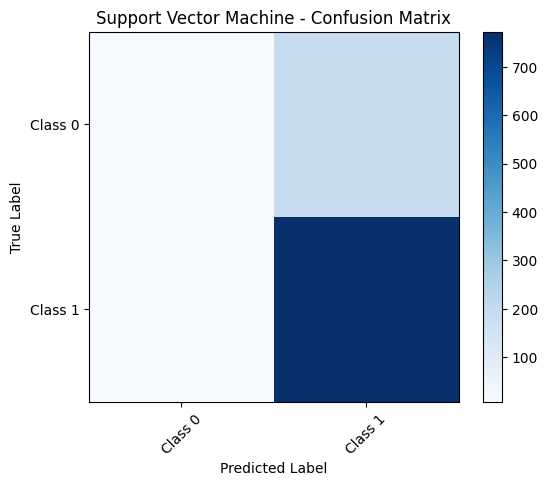

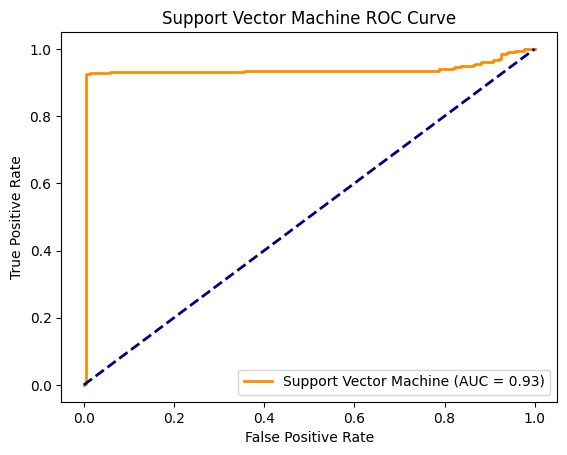

In [ ]:
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')

# Plot confusion matrices and ROC curves
for result in evaluation_results:
    model_name = result['Model']

    # Plot Confusion Matrix
    plt.figure()
    plot_confusion_matrix(result['Confusion Matrix'], classes=['Class 0', 'Class 1'], title=f'{model_name} - Confusion Matrix')

    # Plot ROC Curve
    if result['ROC-AUC'] is not None:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure()
        plot_roc_curve(fpr, tpr, result['ROC-AUC'], model_name)

plt.show()
